One week ago today, we lost one of the most inspirational mathematicians of this generation.

After a lifetime of incredible achievement, [John Conway](https://en.wikipedia.org/wiki/John_Horton_Conway) died on Saturday, 11th April 2020. This left many people—from the mathematically avid to those with merely a passing interest—only to reminisce about both the amazing leaps forwards he made in his work, but more importantly how he brought out the beauty and charm in areas of mathematics that previously seemed bland.

Conway was a unique character with many a story to his name. Some of these tales are so wonderful that I don't dare mention them myself for fear of butchering the narrative. Instead, I would like to point readers towards this [short episode](https://www.numberphile.com/podcast/john-conway-tribute) of the Numberphile Podcast in which many respected mathematicians and acquaintances of Conway share their memories of his life. Conway was as close as you could get to the mathematical equivalent of a rock star, with the stage presence, devoted fans, and involvement in crazy anecdotes to match, so please do have a listen.

Conway wasn't just an inspirational and amusing figure, but a talented and insightful mathematician. Despite being best known for his "[Game of Life](https://bitstorm.org/gameoflife/)"—a zero player game with simple rules, from which immense complexity and beauty emerges, and ironically one which he didn't think much of himself—Conway made fascinating novel discoveries across many areas of mathematics. Be it, geometry, number theory, combinatorics, or group theory, Conway contributed incredible ideas to the mathematical community, a few highlights being his work with surreal numbers, moonshine theory, and the icosians. 

As a form of tribute to Conway, I wanted to discuss a particular discovery he made in his career that still fascinates me to this day. It concerns the 'look-and-say sequence'. The next section of this post will be used to quickly introduce this sequence and share some Python code that can be used to generate its terms (don't worry if you can't code—this will be short and incidental). We will then discuss Conway's relevance to this sequence, and close with an interesting puzzle to ponder, for which I'm yet to obtain a solution.

## The Look-and-Say Sequence

The beauty of the look-and-say sequence is how simple it is to define. You don't need any mathematical background and little thought is required to find the next term. You simply 'look-and-say'.

The sequence starts plainly with a single digit 1:

`1`

We look at this and say what we see. That is, "I can see one one". Then, all we have to do is write down what we said—"one, one":

`1 1`

That's it, the second term of the sequence consists of two numbers, both of which are ones. We now say this term out loud. That is "I can see two ones". We ignore the plural and focus on the key part of what we said—"two, one", our next term:

`2 1`

Repeating this one more time we get "I can see one two, and one one"—"one, two, one, one":

`1 2 1 1`

And one more for good measure. We read "one one, one two, and two ones" giving us:

`1 1 1 2 2 1`

If we were to continue this sequence a few more times we would obtain the following terms:

`3 1 2 2 1 1`

`1 3 1 1 2 2 2 1`

`1 1 1 3 2 1 3 2 1 1`

We could go on forever if we wanted to, though I think you get the point. And frankly, writing these all out by hand is labourious and prone to mistakes. Instead, it would be useful if we could leverage computing power to generate these for us. Thankfully this can be done with little effort using the Python script below (if you don't care for coding, don't worry, we'll move promptly past this).

In [87]:
from time import time

def look_and_say(n):
    """Generate the look-and-say sequence up to term n.

    Returns a list of sequence members and elapsed times.
    """
    sequence = [[1]]
    elapsed = [0]
    start = time()

    for i in range(n-1):
        next_elem = []
        run_val = sequence[i][0]
        run_len = 1
        
        # loop through rest of sequence with dummy value at end
        for val in sequence[i][1:] + [-1]:
            if val != run_val:
                next_elem.extend([run_len, run_val])
                run_len = 1
                run_val = val
            else:
                run_len += 1

        sequence.append(next_elem)
        elapsed.append(time() - start)

    return sequence, elapsed

Whether this code makes sense to you or not makes no difference. The important idea is we can use this to quickly generate some more terms. Here are the next 10 terms from where we got to before (`1 1 1 3 2 1 3 2 1 1`):

In [88]:
next_ten_terms = look_and_say(17)[0][8:]
print(*[' '.join(map(str, term)) for term in next_ten_terms],
      sep = '\n\n')

3 1 1 3 1 2 1 1 1 3 1 2 2 1

1 3 2 1 1 3 1 1 1 2 3 1 1 3 1 1 2 2 1 1

1 1 1 3 1 2 2 1 1 3 3 1 1 2 1 3 2 1 1 3 2 1 2 2 2 1

3 1 1 3 1 1 2 2 2 1 2 3 2 1 1 2 1 1 1 3 1 2 2 1 1 3 1 2 1 1 3 2 1 1

1 3 2 1 1 3 2 1 3 2 1 1 1 2 1 3 1 2 2 1 1 2 3 1 1 3 1 1 2 2 2 1 1 3 1 1 1 2 2 1 1 3 1 2 2 1

1 1 1 3 1 2 2 1 1 3 1 2 1 1 1 3 1 2 3 1 1 2 1 1 1 3 1 1 2 2 2 1 1 2 1 3 2 1 1 3 2 1 3 2 2 1 1 3 3 1 2 2 2 1 1 3 1 1 2 2 1 1

3 1 1 3 1 1 2 2 2 1 1 3 1 1 1 2 3 1 1 3 1 1 1 2 1 3 2 1 1 2 3 1 1 3 2 1 3 2 2 1 1 2 1 1 1 3 1 2 2 1 1 3 1 2 1 1 1 3 2 2 2 1 2 3 1 1 3 2 2 1 1 3 2 1 2 2 2 1

1 3 2 1 1 3 2 1 3 2 2 1 1 3 3 1 1 2 1 3 2 1 1 3 3 1 1 2 1 1 1 3 1 2 2 1 1 2 1 3 2 1 1 3 1 2 1 1 1 3 2 2 2 1 1 2 3 1 1 3 1 1 2 2 2 1 1 3 1 1 1 2 3 1 1 3 3 2 1 1 1 2 1 3 2 1 1 3 2 2 2 1 1 3 1 2 1 1 3 2 1 1

1 1 1 3 1 2 2 1 1 3 1 2 1 1 1 3 2 2 2 1 2 3 2 1 1 2 1 1 1 3 1 2 2 1 2 3 2 1 1 2 3 1 1 3 1 1 2 2 2 1 1 2 1 1 1 3 1 2 2 1 1 3 1 1 1 2 3 1 1 3 3 2 2 1 1 2 1 3 2 1 1 3 2 1 3 2 2 1 1 3 3 1 1 2 1 3 2 1 2 3 1 2 3 1 1 2 1 1 1 3 1 2 2 1 

As you can see, these get big, fast. In fact, let's create two plots to visualise this growth. The first will show the how the length of each term of the sequence is increasing and the second will show how long it takes us to compute terms up to that point.

In [89]:
n = 70
sequence, elapsed = look_and_say(n)
indicies = [i + 1 for i in range(n)]

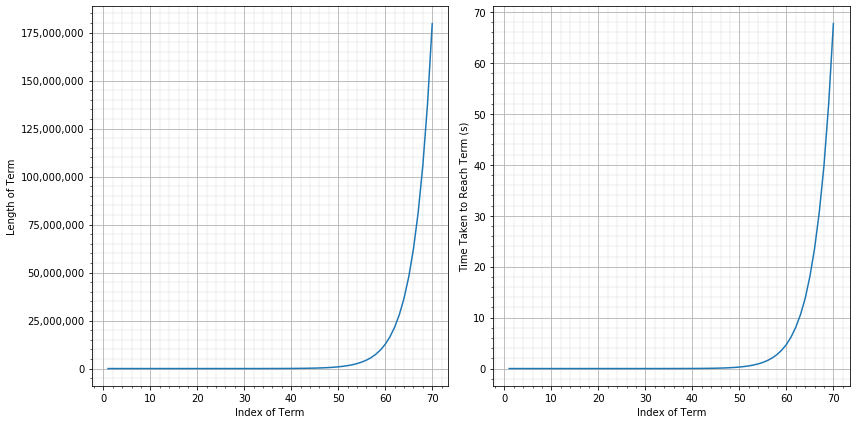

In [90]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(indicies, [len(term) for term in sequence])
axs[0].set_xlabel('Index of Term')
axs[0].set_ylabel('Length of Term')
# axs[0].set_yscale('log')
axs[0].ticklabel_format(style='plain', useLocale=False, axis='y')
axs[0].get_yaxis().set_major_formatter(tck.FuncFormatter(lambda x, p: 
                                                         format(int(x), ',')))
axs[0].grid()
axs[0].minorticks_on()
axs[0].grid(which='minor', linestyle='-', linewidth=.2)

axs[1].plot(indicies, elapsed)
axs[1].set_xlabel('Index of Term')
axs[1].set_ylabel('Time Taken to Reach Term (s)')
# axs[1].set_yscale('log')
axs[1].grid()
axs[1].minorticks_on()
axs[1].grid(which='minor', linestyle='-', linewidth=.2)

fig.patch.set_facecolor('white')
fig.tight_layout();

Reading off the graph, we see that the 70th term of our sequence was composed of over one hundred million digits. Thank god we decided to switch to Python! On top of that, it took the script (which is reasonably efficient) over a minute to reach this point.

Both of these graphs are clear examples of exponential growth. That is, the length of a a term in the sequence can be approximated by taking the length of the previous term and multiplying it by some fixed scale factor (likewise for the computation time). What exactly is this scale factor though? This is where our friend Conway can offer a hand.

## Conway's Constant

Enter: John Conway.

As we eluded to in the introduction, Conway was not a complacent man when it came to mathematics, and one of his numerous discoveries was that of Conway's constant. This number is of interest to us because it is exactly the value of the scale factor related to the look-and-see problem.

This in itself is not necessarily interesting—many people solve mathematical problems just like this all the time; why is this particular solution so special? Well, the real wonder of Conway's constant comes from seeing the crazy way in which it is defined. In short, Conway's constant is the unique positive value $x$ such that to the following expression is equal to zero.

This is a monsterous equation, making it notable in itself that Conway managed to find it and prove its relation to the look-and-say puzzle. What fascinates mathematicians about this equation is the question of 'why?'—Why is this the solution?

Why is the highest power 71? Why is there no 70th term? Why are the coefficents the values they are? Why does this even relate to the look-and-say problem? These are all incredibly difficult questions whose answers largely come down to 'just cos'. It almost feels like the look-and-see problem is some sort of cosmic joke the universe is playing on us. Normally when you solve a problem with this sort of beauty and structure the answer comes out to be something stunningly simple: perhaps some multiple of the famous constants $e$, $pi$, or $\phi$, or at the very least the solution to an equation of degree 2 or 3 with a pattern to the coefficients. But degree 71 with no clear pattern to the coefficients? That's something special.

And frankly, I don't believe this could be more fitting. Conway was an odd yet utterly wonderful man, both unusual and iconoclastic, yet full of ideas with such beauty and fascination. His constant seems to barely differ. And just as the mathematical laws governing this constant will live on, so will Conway, and his weird but wonderful ways, in our memories.

## An Intriguing Pattern

I don't think Conway would have liked a soppy ending, but rather closing by revealing new avenue of thought to persue, so this is what I will do. When I was coding up the look-say-generator above, I noticed an interesting pattern emerging.

First, it's worth noting that it is impossible for a term in the look and say sequence to contain a digit greater than three. The argument is the same for all numbers over three so we will focus on proving this for just four. The argument is rather simple, involving backtracking through the sequence. Suppose our sequence contained a number four at some point. Then, in the previous term there must have been a subsequence such as `1 1 1 1` or the same with `2`/`3`. This would only arise if we had said "one, one, and one, one" or the equivalent. That is, we must have had `1 1` in the term before that. But this would be read as `2 1`, not `1 1 1 1` and so we don't in fact obtain a four.

With that out of the way, we can move towards the pattern I discovered. This concerned the proportions that the digits `1`, `2`, and `3` shared as the sequence progressed. For example in the sixth term (3 1 2 2 1 1), the split is $\left(\frac{1}{2},\frac{1}{3},\frac{1}{6}\right)$. What is the long term behaviour of this distribution? I expected it to be semi-chaotic, but was instead surprised to find that the proportions eventually converged sharply:

In [91]:
props = [[0 for _2 in range(n)] for _1 in range(3)]
for i, seq in enumerate(sequence):
    # count first
    for elem in seq:
        props[elem - 1][i] += 1
    # then normalise
    for j in range(3):
        props[j][i] /= len(seq)

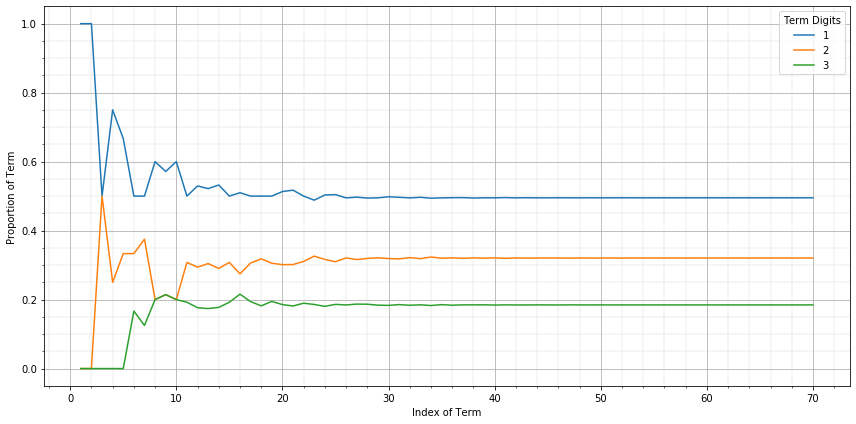

In [92]:
fig, ax = plt.subplots(figsize=(12, 6))

for i in range(3):
    ax.plot(indicies, props[i], label=f'{i+1}')
ax.legend(title="Term Digits")
ax.set_xlabel('Index of Term')
ax.set_ylabel('Proportion of Term');
ax.grid()
ax.minorticks_on()
ax.grid(which='minor', linestyle='-', linewidth=.2)

fig.patch.set_facecolor('white')
fig.tight_layout();

As we can see, once we pass the 20th or so term, the digit proportions rapidly converge to what seems to be $\left(\frac{99}{200},\frac{8}{25},\frac{37}{200}\right)$ or something close by at the least. This leaves us with one more 'why?' to address.

Of the many articles I have read about the look-and-say sequence, none make explicit mention of this phenomenon, and nothing particularly obvious jumps out at me regarding these ratios. I haven't had the time to delve into the problem properly as I wanted to release this post in a timely manner but I will explore this pattern further at some point. And if do come across an interesting explanation, I will write a follow up post. That is, if I never mention this problem again, I either failed to reach a solution or the solution turned out too be dull to write about (and I would prefer it if we just assume the latter).

If any of my more mathematical readers want to have a crack at this problem by themselves, I would be interested to hear about a solution if one is obtained. For now, all I can offer is what my gut instinct says, and hope that this shows promise: perhaps modeling the limiting terms of the problem as a Markov chain and attempting to find a stationary distribution could provide a reasonable explanation. Furthermore, perhaps Conway's constant has something to do with these peculiar ratios—it would seem fitting that this oddity comes from that source after all.

Either way, I hope this post has made clear what an amazing man Conway was, and the shear wonder that his theorems and ideas brought to the mathematical world. He has been an inspiration to myself and many other mathematicians, and for that reason, he will be sorely missed.